In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_alternance_boxplot(path: str, ax=None) -> None:
    """
    Plot a boxplot of Alternance for each Group, separating by Age.

    Args:
        path (str): Path to the Excel file.
        ax (matplotlib.axes.Axes, optional): Axis to plot on. Creates a new figure if None.

    Returns:
        None
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Load the Excel file
    df = pd.read_excel(path)

    # Sort by Group and Age for consistency
    df = df.sort_values(by=["Group", "Age"])

    # Get unique groups and ages
    groups = df["Group"].unique()
    ages = sorted(df["Age"].unique())

    # Prepare data for boxplot
    data = []
    positions = {}
    age_labels = []
    group_spacing = 1.5  # Space between groups
    box_width = 0.4  # Width of each box
    jitter = 0.05  # Scatter plot jitter

    for i, group in enumerate(groups):
        positions[group] = {}  # Store x positions for each age inside each group
        for j, age in enumerate(ages):
            values = df[(df["Group"] == group) & (df["Age"] == age)]["Alternance"]
            if not values.empty:
                x_pos = i * group_spacing + j * box_width  # X position based on group index
                positions[group][age] = x_pos  # Store position for connecting lines
                data.append(values)

    # Create the boxplot (without color fill)
    ax.boxplot(data, positions=[x for group in groups for x in positions[group].values()], widths=box_width,
               patch_artist=False, boxprops=dict(color="black"), whiskerprops=dict(color="black"),
               capprops=dict(color="black"), medianprops=dict(color="black"))

    # Scatter plot to overlay individual points
    colors = ["blue", "red", "green", "orange"][: len(ages)]  # One color per age
    for group in groups:
        for age, x_pos in positions[group].items():
            values = df[(df["Group"] == group) & (df["Age"] == age)]["Alternance"]
            ax.scatter([x_pos + np.random.uniform(-jitter, jitter) for _ in values], values, 
                       color=colors[ages.index(age)], alpha=0.7, edgecolor="black")

    # Correctly aligned connecting lines for individual mice across ages within groups
    for group in groups:
        for mouse in df[df["Group"] == group]["Mouse"].unique():
            mouse_values = df[(df["Group"] == group) & (df["Mouse"] == mouse)]
            if len(mouse_values) == len(ages):  # Ensure the mouse has data for all ages
                x_positions = [positions[group][age] for age in ages if age in positions[group]]
                y_values = [mouse_values[mouse_values["Age"] == age]["Alternance"].values[0] for age in ages]
                ax.plot(x_positions, y_values, color="gray", linestyle="-", linewidth=0.5, alpha=0.6)

    # Set x-axis labels (groups, with ages inside)
    ax.set_xticks([(i * group_spacing + (len(ages) - 1) * box_width / 2) for i in range(len(groups))])
    ax.set_xticklabels(groups, fontsize=12)
    # ax.set_xlabel("Group", fontsize=12)
    ax.set_ylabel("Proportion of alternances (%)", fontsize=12)
    ax.set_title("Y Maze", fontsize=14)

    # Add legend for ages
    handles = [plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=color, markersize=8) for color in colors]
    ax.legend(handles, ages, title="Age")

    # Grid for readability
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()




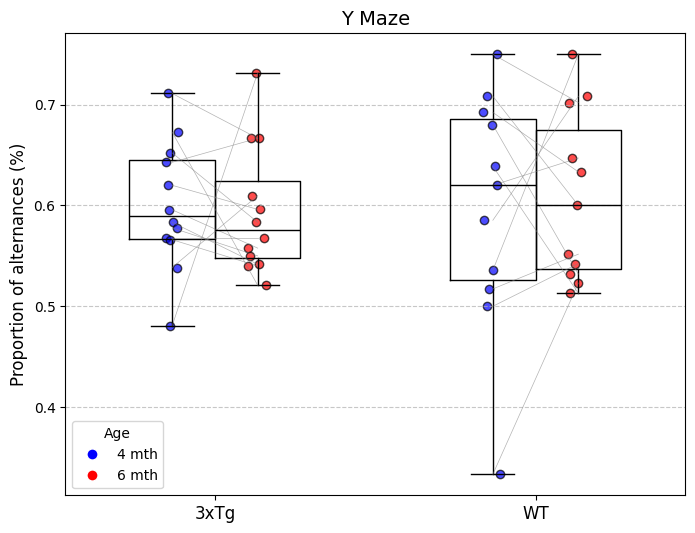

In [2]:
file_path = r"c:\Users\dhers\OneDrive\Para Agus\plot Y maze.xlsx"
plot_alternance_boxplot(file_path)